# Návrh systémů IoT

## 4. Zpracování časových řad. 

### [Tabulky](#tabulky)

In [52]:
import pandas

actors = pandas.read_csv('files/actors.csv', index_col=None)
actors

name  birth  alive
0    Terry   1942  False
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True

In [53]:
actors = pandas.read_csv('files/actors.csv', index_col=0)
actors

birth  alive
name                 
Terry     1942  False
Michael   1943   True
Eric      1943   True
Graham    1941  False
Terry     1940   True
John      1939   True

### [Čtení zdrojových dat z databáze](#cteni-z-databaze)

In [54]:
import sqlite3

con = sqlite3.connect("files/iot.db")
df = pandas.read_sql_query("SELECT * FROM hodnoty", con)

# index lze nastavit samostatnym prikazem
# df = df.set_index('id')
df.head()

id            timestamp  temperature  humidity
0   1  2023-03-09 13:44:10         3.14     25.50
1   2  2023-03-09 13:46:13         3.18     25.60
2   3  2023-03-09 14:09:37         2.70     25.95
3   4  2023-03-09 14:09:37         2.37     26.04
4   5  2023-03-09 14:09:37         1.95     25.56

<AxesSubplot:>

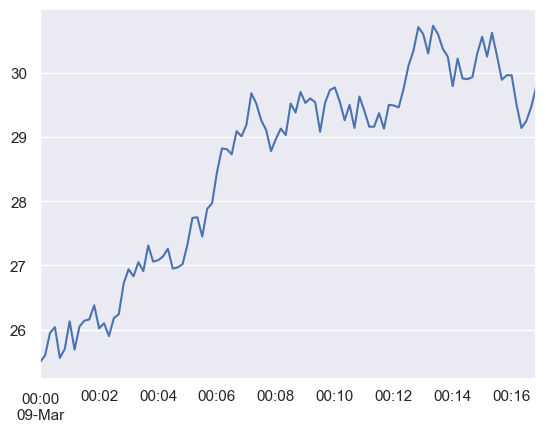

In [55]:
# df = df.reset_index()
# df = df.set_index('timestamp')
rng = pandas.date_range('2023-03-09', periods=102, freq='10s')
df = df.set_index(rng)
df.head()
temp = df['humidity']
temp.plot()

### [Vytváření tabulek ze složených datových typů](#tabulky-list-dict)

In [56]:
items = pandas.DataFrame([
    ["Book", 123],
    ["Computer", 2185],
])
items

0     1
0      Book   123
1  Computer  2185

In [57]:
items = pandas.DataFrame([
    {"name": "Book", "price": 123},
    {"name": "Computer", "price": 2185},
])
items

name  price
0      Book    123
1  Computer   2185

### [Informace o tabulkách](#informace-o-tabulkach)

In [58]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Terry to John
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   birth   6 non-null      int64
 1   alive   6 non-null      bool 
dtypes: bool(1), int64(1)
memory usage: 102.0+ bytes


### [Sloupce](#sloupce)

In [59]:
birth_years = actors['birth']
birth_years

name
Terry      1942
Michael    1943
Eric       1943
Graham     1941
Terry      1940
John       1939
Name: birth, dtype: int64

In [60]:
type(birth_years)

pandas.core.series.Series

In [61]:
birth_years.name

'birth'

In [62]:
birth_years.index

Index(['Terry', 'Michael', 'Eric', 'Graham', 'Terry', 'John'], dtype='object', name='name')

In [63]:
birth_years.dtype

dtype('int64')

### [Operace se sloupci](#operace-se-sloupci)

In [64]:
ages = 2023 - birth_years
ages

name
Terry      81
Michael    80
Eric       80
Graham     82
Terry      83
John       84
Name: birth, dtype: int64

In [65]:
century = birth_years // 100 + 1
century

name
Terry      20
Michael    20
Eric       20
Graham     20
Terry      20
John       20
Name: birth, dtype: int64

In [66]:
birth_years > 1940

name
Terry       True
Michael     True
Eric        True
Graham      True
Terry      False
John       False
Name: birth, dtype: bool

In [67]:
actors = actors.reset_index()
print(actors)
actors['name'] + [' (1)', ' (2)', ' (3)', ' (4)', ' (5)', ' (6)']

      name  birth  alive
0    Terry   1942  False
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True


0      Terry (1)
1    Michael (2)
2       Eric (3)
3     Graham (4)
4      Terry (5)
5       John (6)
Name: name, dtype: object

### [Výběr prvků](#vyber-prvku)

In [68]:
birth_years[2]

1943

In [69]:
birth_years[2:-2]

name
Eric      1943
Graham    1941
Name: birth, dtype: int64

In [70]:
birth_years[birth_years > 1940]

name
Terry      1942
Michael    1943
Eric       1943
Graham     1941
Name: birth, dtype: int64

### [Agregační funkce](#agregacni-funkce)

In [71]:
print('Součet: ', birth_years.sum())
print('Průměr: ', birth_years.mean())
print('Medián: ', birth_years.median())
print('Počet unikátních hodnot: ', birth_years.nunique())
print('Koeficient špičatosti: ', birth_years.kurtosis())

Součet:  11648
Průměr:  1941.3333333333333
Medián:  1941.5
Počet unikátních hodnot:  5
Koeficient špičatosti:  -1.4812500000001654


### [Vybírání prvků ze sloupců](#vybirani-prvku-ze-sloupcu)

In [72]:
# TODO

### [Indexex loc](#indexex-loc)

In [73]:
actors.loc[2:4,'birth':'alive']

birth  alive
2   1943   True
3   1941  False
4   1940   True

### [Indexer iloc](#indexer-iloc)

In [74]:
# TODO

## [Příklad 1](#priklad-1)
### Data z databáze IMDB

In [75]:
movies_df = pandas.read_csv("files/imdb.csv", index_col="Title")
movies_df.head()

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               Description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  \
Title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   
Split                    2016                117     7.3  157606   
Sing                     2016                108     7.2   60545   
Suicide Squad            2016                123     6.2  393727   

                         Revenue (Millions)  Metascore  
Title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0  
Split                                138.12       62.0  
Sing                                 270.32       59.0  
Suicide Squad                        325.02       40.0

In [76]:
### Hledání duplikátů, práce s daty

In [77]:
temp_df = movies_df.append(movies_df)
temp_df.head()

C:\Users\standa\AppData\Local\Temp\ipykernel_21644\175408295.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = movies_df.append(movies_df)


Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               Description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  \
Title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   
Split                    2016                117     7.3  157606   
Sing                     2016                108     7.2   60545   
Suicide Squad            2016                123     6.2  393727   

                         Revenue (Millions)  Metascore  
Title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0  
Split                                138.12       62.0  
Sing                                 270.32       59.0  
Suicide Squad                        325.02       40.0

In [78]:
movies_df.isnull()

Rank  Genre  Description  Director  Actors   Year  \
Title                                                                         
Guardians of the Galaxy  False  False        False     False   False  False   
Prometheus               False  False        False     False   False  False   
Split                    False  False        False     False   False  False   
Sing                     False  False        False     False   False  False   
Suicide Squad            False  False        False     False   False  False   
...                        ...    ...          ...       ...     ...    ...   
Secret in Their Eyes     False  False        False     False   False  False   
Hostel: Part II          False  False        False     False   False  False   
Step Up 2: The Streets   False  False        False     False   False  False   
Search Party             False  False        False     False   False  False   
Nine Lives               False  False        False     False   False  False   

                         Runtime (Minutes)  Rating  Votes  Revenue (Millions)  \
Title                                                                           
Guardians of the Galaxy              False   False  False               False   
Prometheus                           False   False  False               False   
Split                                False   False  False               False   
Sing                                 False   False  False               False   
Suicide Squad                        False   False  False               False   
...                                    ...     ...    ...                 ...   
Secret in Their Eyes                 False   False  False                True   
Hostel: Part II                      False   False  False               False   
Step Up 2: The Streets               False   False  False               False   
Search Party                         False   False  False                True   
Nine Lives                           False   False  False               False   

                         Metascore  
Title                               
Guardians of the Galaxy      False  
Prometheus                   False  
Split                        False  
Sing                         False  
Suicide Squad                False  
...                            ...  
Secret in Their Eyes         False  
Hostel: Part II              False  
Step Up 2: The Streets       False  
Search Party                 False  
Nine Lives                   False  

[1000 rows x 11 columns]

In [79]:
movies_df.isnull().sum()

Rank                    0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [80]:
revenue = movies_df['Revenue (Millions)']
revenue_mean = revenue.mean()
print(revenue_mean)
revenue.fillna(revenue_mean, inplace=True)
movies_df.isnull().sum()

82.95637614678898


Rank                   0
Genre                  0
Description            0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)     0
Metascore             64
dtype: int64

In [81]:
movies_df.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count         1000.000000  936.000000  
mean            82.956376   58.985043  
std             96.412043   17.194757  
min              0.000000   11.000000  
25%             17.442500   47.000000  
50%             60.375000   59.500000  
75%             99.177500   72.000000  
max            936.630000  100.000000

## [Příklad 2](#priklad-2)
### E-shop

In [82]:
import itertools
import random
import pandas

random.seed(0)

months = pandas.date_range('2015-01', '2016-12', freq='M')

categories = ['Electronics', 'Power Tools', 'Clothing']

data = pandas.DataFrame(
  [
    {'month': a, 'category': b, 'sales': random.randint(-1000, 10000)}
    for a, b in itertools.product(months, categories) if random.randrange(20) > 0
  ])

data.head()

month     category  sales
0 2015-01-31  Electronics   5890
1 2015-01-31  Power Tools   3242
2 2015-01-31     Clothing   6961
3 2015-02-28  Electronics   3969
4 2015-02-28  Power Tools   4866

In [83]:
indexed = data.set_index(['category', 'month'])
indexed.head()

sales
category    month            
Electronics 2015-01-31   5890
Power Tools 2015-01-31   3242
Clothing    2015-01-31   6961
Electronics 2015-02-28   3969
Power Tools 2015-02-28   4866

In [84]:
unstacked = indexed.unstack('month')
unstacked

sales                                                         \
month       2015-01-31 2015-02-28 2015-03-31 2015-04-30 2015-05-31 2015-06-30   
category                                                                        
Clothing        6961.0     2578.0     9131.0      618.0     4796.0     8052.0   
Electronics     5890.0     3969.0     1281.0     7725.0     4409.0     4180.0   
Power Tools     3242.0     4866.0     1289.0     1407.0     8171.0     9492.0   

                                                         ...             \
month       2015-07-31 2015-08-31 2015-09-30 2015-10-31  ... 2016-02-29   
category                                                 ...              
Clothing        7989.0        NaN       31.0     7896.0  ...     4194.0   
Electronics     6253.0        NaN     7086.0     8298.0  ...     6290.0   
Power Tools     3267.0     5534.0     2996.0     2909.0  ...     8769.0   

                                                                               \
month       2016-03-31 2016-04-30 2016-05-31 2016-06-30 2016-07-31 2016-08-31   
category                                                                        
Clothing        2059.0      471.0     5410.0     8663.0     9817.0     6969.0   
Electronics     2966.0     9039.0     1450.0     3515.0     8497.0      349.0   
Power Tools     2012.0     6807.0      314.0     2858.0     6382.0     9039.0   

                                              
month       2016-09-30 2016-10-31 2016-11-30  
category                                      
Clothing        -735.0     4448.0     -259.0  
Electronics     9324.0      919.0       18.0  
Power Tools     2119.0     5095.0     1397.0  

[3 rows x 23 columns]

In [85]:
unstacked.columns = unstacked.columns.droplevel()
unstacked

month        2015-01-31  2015-02-28  2015-03-31  2015-04-30  2015-05-31  \
category                                                                  
Clothing         6961.0      2578.0      9131.0       618.0      4796.0   
Electronics      5890.0      3969.0      1281.0      7725.0      4409.0   
Power Tools      3242.0      4866.0      1289.0      1407.0      8171.0   

month        2015-06-30  2015-07-31  2015-08-31  2015-09-30  2015-10-31  ...  \
category                                                                 ...   
Clothing         8052.0      7989.0         NaN        31.0      7896.0  ...   
Electronics      4180.0      6253.0         NaN      7086.0      8298.0  ...   
Power Tools      9492.0      3267.0      5534.0      2996.0      2909.0  ...   

month        2016-02-29  2016-03-31  2016-04-30  2016-05-31  2016-06-30  \
category                                                                  
Clothing         4194.0      2059.0       471.0      5410.0      8663.0   
Electronics      6290.0      2966.0      9039.0      1450.0      3515.0   
Power Tools      8769.0      2012.0      6807.0       314.0      2858.0   

month        2016-07-31  2016-08-31  2016-09-30  2016-10-31  2016-11-30  
category                                                                 
Clothing         9817.0      6969.0      -735.0      4448.0      -259.0  
Electronics      8497.0       349.0      9324.0       919.0        18.0  
Power Tools      6382.0      9039.0      2119.0      5095.0      1397.0  

[3 rows x 23 columns]

In [86]:
unstacked.loc['Electronics'].sum()

103742.0

<AxesSubplot:xlabel='category'>

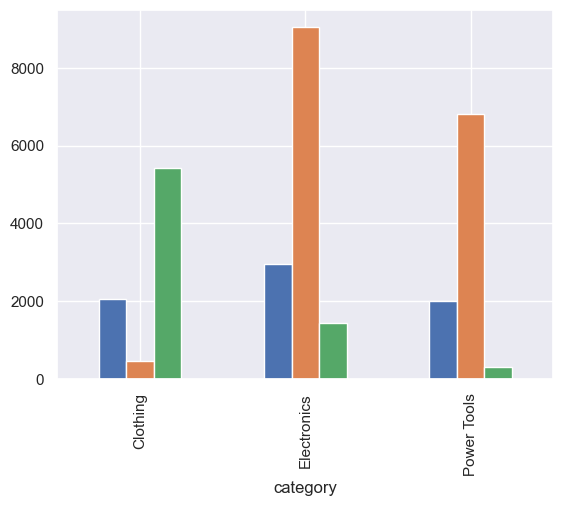

In [87]:
unstacked.loc[:, '2016-03':'2016-05'].plot.bar(legend=False)

In [88]:
import pandas as pd
import numpy as np

date = pd.to_datetime("4th of July, 2015")

# date + pd.to_timedelta(np.arange(12), 'M')
date + pd.DateOffset(months=2)

Timestamp('2015-09-04 00:00:00')

## [Příklad 3](#priklad-3)
### Vývoj ceny akcií

In [89]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

goog = data.DataReader('GOOG', start='2004-01-01', end='2016-12-31')
goog.head()


[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512

In [90]:
goog = goog['Close']

### [Vizualizace](#vizualizace)

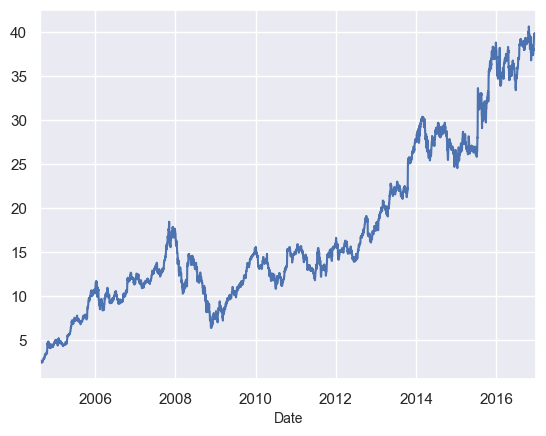

In [100]:
import matplotlib.pyplot as plt
import pandas
import seaborn

# seaborn.set()
plt.rcParams.update({'font.size': 12})
plt.xlabel('ylabel', fontsize=10)

goog.plot();

### [Převzorkování a konverze frekvencí](#prevzorkovani)

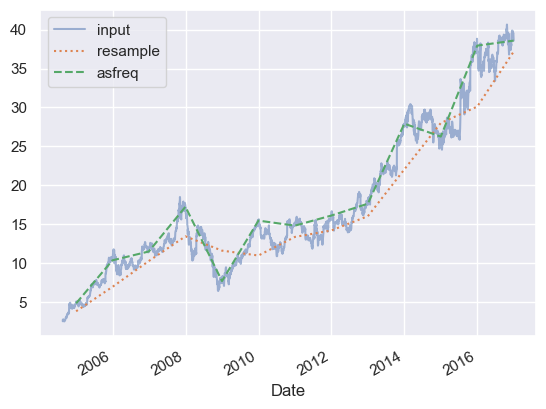

In [92]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

### [Časové posuny](#casove-posuny)

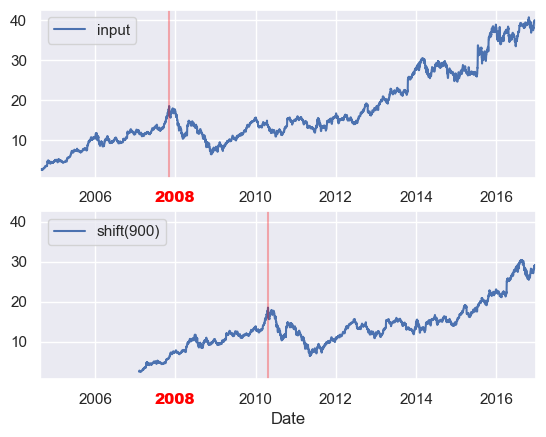

In [106]:
fig, ax = plt.subplots(2, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])

# legends and annotations
local_max = pandas.to_datetime('2007-11-05')
offset = pandas.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

### [Klouzavý průměr](#klouzavy-prumer)

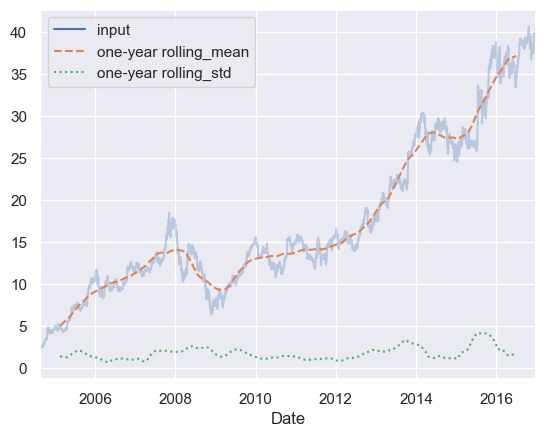

In [105]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)